In [1]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import folium
import pandas as pd
import math
import plotly.graph_objects as go

In [46]:
df = pd.read_csv('time_series_19-covid-Confirmed.csv')
df[df['Country/Region'] == 'Germany']
#df.at['Total', df.columns] = df.iloc[:, 4:].sum()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
54,NaN,Germany,51.0,9.0,0,0,0,0,0,1,...,16,16,16,16,16,16,17,27,46,48


In [47]:
dates = np.array(df.columns)
newDF = df.iloc[60, 4:34]
newDF.columns = ['ds', 'y']
ndf = pd.DataFrame(data=newDF)
actDF = df.iloc[60, 4:]
actDF.columns = ['ds', 'y']
actdf = pd.DataFrame(data=actDF)

In [48]:
modified = ndf.reset_index()
modified.columns = ['ds', 'y']
actmod = actdf.reset_index()
actmod.columns = ['ds', 'y']
df.loc[df["Province/State"].isna(), 'Province/State'] = df.loc[df["Province/State"].isna(), 'Country/Region']

In [58]:
df['Text'] = df['Province/State'] + '<br>Confirmed ' + (df['2/28/20']).astype(str)

limits = [(0,2),(3,10),(11,20),(21,50),(50,float("inf"))]
colors = ["crimson", "royalblue", "lightseagreen", "orange", "lightgrey"]
colors.reverse()
cities = []
fig = go.Figure()
fig.update_geos(projection_type="natural earth",
               showcountries=True)


for i in range(len(limits)):
    lim = limits[i]
    mask = (df['2/28/20'] >= lim[0]) & (df['2/28/20'] <= lim[1])
    df_sub = df.loc[mask]
    df_sub["log"] = (np.log(df_sub['2/28/20'])/np.log(75))
    df_sub.loc[df_sub["log"] == -float("inf"), "log"] = 0
    #print(df_sub["log"].describe())
    fig.add_trace(go.Scattergeo(
        lon = df_sub['Long'],
        lat = df_sub['Lat'],
        text = df_sub['Text'],
        marker = dict(
            size = df_sub["log"]*i*100,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2020 prediction Corona',
        showlegend = True,
        geo = dict(
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

/home/ogencer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['Text'] = df['Province/State'] + '<br>Confirmed ' + (df['2/28/20']).astype(str)

limits = [(0,2),(3,10),(11,20),(21,50),(50,float("inf"))]
colors = ["crimson", "royalblue", "lightseagreen","orange","lightgrey"]
colors.reverse()
cities = []
fig = go.Figure()
fig.update_geos(projection_type="natural earth",
               showcountries=True)


for i in range(len(limits)):
    lim = limits[i]
    mask = (df['2/28/20'] >= lim[0]) & (df['2/28/20'] <= lim[1])
    df_sub = df.loc[mask]
    df_sub["log"] = (np.log(df_sub['2/28/20'])/np.log(75))
    df_sub.loc[df_sub["log"] == -float("inf"), "log"] = 0
    #print(df_sub["log"].describe())
    fig.add_trace(go.Scattergeo(
        lon = df_sub['Long'],
        lat = df_sub['Lat'],
        text = df_sub['Text'],
        marker = dict(
            size = df_sub["log"]*i*100,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2020 prediction Corona',
        showlegend = True,
        geo = dict(
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [60]:
import plotly.express as px
df = px.data.gapminder()
print(df)

          country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  

In [61]:
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

In [147]:
m = Prophet()
m.fit(modified)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [148]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
32,2020-02-23
33,2020-02-24
34,2020-02-25
35,2020-02-26
36,2020-02-27


In [149]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
32,2020-02-23,4.394632,3.754073,5.060236
33,2020-02-24,4.394768,3.725706,5.014322
34,2020-02-25,4.394909,3.752236,5.013217
35,2020-02-26,4.473335,3.836398,5.126330
36,2020-02-27,4.473461,3.841627,5.113140


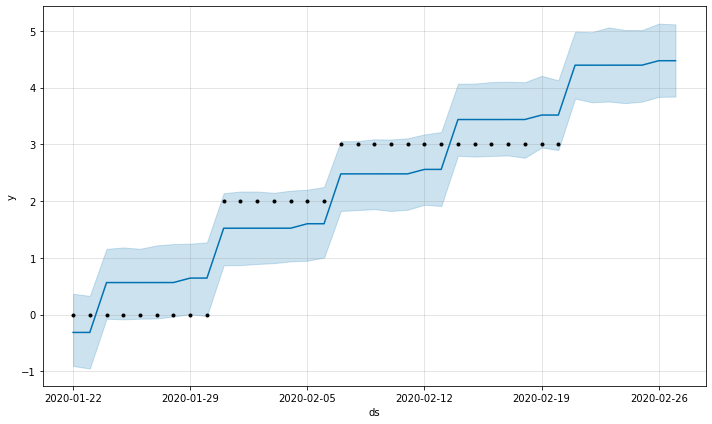

In [151]:
fig1 = m.plot(forecast)

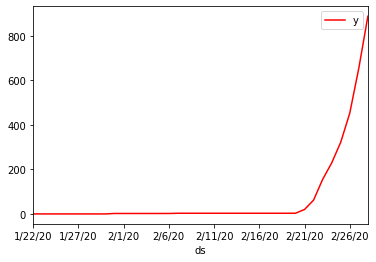

In [152]:
actmod.plot(kind='line',x='ds',y='y',color='red')
plt.show()

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_ebola.csv')
df.head()

colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']
months = {6:'June',7:'July',8:'Aug',9:'Sept'}

fig = go.Figure()

for i in range(6,10)[::-1]:
    df_month = df.query('Month == %d' %i)
    fig.add_trace(go.Scattergeo(
            lon = df_month['Lon'],
            lat = df_month['Lat'],
            text = df_month['Value'],
            name = months[i],
            marker = dict(
                size = df_month['Value']/75,
                color = colors[i-6],
                line_width = 0
            )))

df_sept = df.query('Month == 9')
fig['data'][0].update(mode='markers+text', textposition='bottom center',
                      text=df_sept['Value'].map('{:.0f}'.format).astype(str)+' '+\
                      df_sept['Country'])

# Inset
fig.add_trace(go.Choropleth(
        locationmode = 'country names',
        locations = df_sept['Country'],
        z = df_sept['Value'],
        text = df_sept['Country'],
        colorscale = [[0,'rgb(0, 0, 0)'],[1,'rgb(0, 0, 0)']],
        autocolorscale = False,
        showscale = False,
    ))



fig.show()